<a href="https://colab.research.google.com/github/SujayDas1999/Neural-network/blob/main/Data_Loaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader,TensorDataset

In [182]:
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data))

labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [183]:
class Model(nn.Module):
  def __init__(self,in_feature=4,hl1=64,hl2=64,out=3):
    super().__init__()
    self.input = nn.Linear(in_feature,hl1)
    self.layer1 = nn.Linear(hl1,hl2)
    self.out = nn.Linear(hl2,out)

  def forward(self,x):
    x = F.relu(self.input(x))
    x = F.relu(self.layer1(x))
    x = self.out(x)
    return x


In [127]:
fakedata = np.tile(np.array([1,2,3,4]), (10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata)
print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [128]:
fakedataLdr = DataLoader(fakedata, shuffle=True)
print(fakedataLdr)
print(fakedataLdr.batch_size)

1


In [129]:
for i, oneSample in enumerate(fakedataLdr):
  print(i,oneSample,oneSample.shape)

0 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
1 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])
2 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
3 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])
4 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
5 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])
6 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])
7 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])
8 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])
9 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])


In [130]:
fakeDatasetTorch = TensorDataset(
    torch.Tensor(fakedata),
    torch.Tensor(fakelabels)
)

fakeDatasetTorch.tensors

(tensor([[ 11.,  12.,  13.,  14.],
         [ 21.,  22.,  23.,  24.],
         [ 31.,  32.,  33.,  34.],
         [ 41.,  42.,  43.,  44.],
         [ 51.,  52.,  53.,  54.],
         [ 61.,  62.,  63.,  64.],
         [ 71.,  72.,  73.,  74.],
         [ 81.,  82.,  83.,  84.],
         [ 91.,  92.,  93.,  94.],
         [101., 102., 103., 104.]]),
 tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))

In [131]:
fakedataLdr = DataLoader(fakeDatasetTorch, shuffle=True)

for dat,lab in fakedataLdr:
  print(dat,lab)

tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[51., 52., 53., 54.]]) tensor([0.])


In [132]:
train_data, test_data, train_label, test_label = train_test_split(
    fakedata,
    fakelabels,
    test_size =.2
)

train_data = TensorDataset(
    torch.Tensor(train_data),
    torch.Tensor(train_label)
)

test_data = TensorDataset(
    torch.Tensor(test_data),
    torch.Tensor(test_label)
)

train_loader = DataLoader(train_data,batch_size=4)
test_loader = DataLoader(test_data)

In [133]:
for dat, lab in train_loader:
  print(dat)

tensor([[61., 62., 63., 64.],
        [71., 72., 73., 74.],
        [91., 92., 93., 94.],
        [51., 52., 53., 54.]])
tensor([[ 81.,  82.,  83.,  84.],
        [ 41.,  42.,  43.,  44.],
        [101., 102., 103., 104.],
        [ 11.,  12.,  13.,  14.]])


In [184]:
# Back to real data!
x_train_data, test_data, train_label, test_label = train_test_split(
    data,
    labels,
    train_size=.8
)

train_data = TensorDataset(
    x_train_data,
    train_label,
)

test_data = TensorDataset(
    test_data,
    test_label
)


train_data = DataLoader(train_data,shuffle=True,batch_size=12)
test_data = DataLoader(test_data)


In [185]:
ANN = nn.Sequential(
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,32),
    nn.ReLU(),
    nn.Linear(32,3)
)

In [175]:
ANN = Model()

In [186]:
list(ANN.parameters())

[Parameter containing:
 tensor([[ 0.4786, -0.1520,  0.0274,  0.3991],
         [ 0.3623,  0.1312, -0.0472, -0.1617],
         [-0.0066, -0.3352,  0.0293, -0.1045],
         [ 0.3688,  0.4726, -0.0076, -0.1703]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4630, -0.4498,  0.1418,  0.4350], requires_grad=True),
 Parameter containing:
 tensor([[ 0.4282,  0.4714, -0.1487,  0.1959],
         [ 0.3407,  0.2080, -0.4172,  0.2987],
         [-0.0046,  0.2024, -0.2231, -0.1391],
         [-0.2562, -0.2216,  0.1117, -0.0894],
         [-0.2594,  0.2935, -0.4548, -0.4462],
         [-0.3045, -0.4570, -0.2002, -0.4840],
         [ 0.4087, -0.2305, -0.4073,  0.0464],
         [-0.3957,  0.0145,  0.1622, -0.4243],
         [ 0.0190,  0.2863, -0.1755, -0.0005],
         [-0.1335,  0.0709, -0.3474,  0.1394],
         [-0.2548,  0.4053, -0.0121, -0.0499],
         [ 0.3897, -0.1622, -0.1416,  0.1665],
         [-0.4642, -0.0819, -0.3570, -0.4159],
         [-0.2843, -0.1685,  0.1692,  0.267

In [187]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANN.parameters(),lr=.01)
epochs = 500
losses = torch.zeros(epochs)
accuracies = []
for epochi in range(epochs):
  for data,label in train_data:
    yHat = ANN.forward(data)
    loss = loss_function(yHat,label.long())
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = torch.argmax(yHat,axis=1) == label
    accuracy = 100 * torch.mean((matches).float())
    accuracies.append(accuracy)



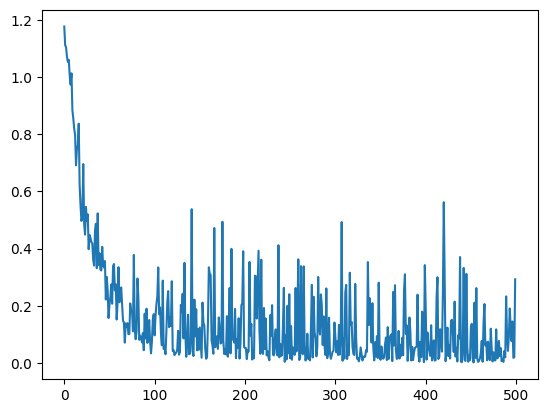

In [188]:
plt.plot(losses.detach())

In [189]:
final_loss = []
correct_pred = []
with torch.no_grad():
  for data,label in test_data:
    yHat = ANN(data)
    loss = loss_function(yHat,label.long())
    prediction = torch.argmax(yHat,axis=1) == label
    correct_pred.append(prediction.item())

In [190]:
total_sum = sum(correct_pred)
acc = 100 * (total_sum/len(correct_pred))

In [191]:
acc

93.33333333333333

Udemy Code

In [163]:
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data))

labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [164]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = \
                              train_test_split(data, labels, train_size=.8)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
train_loader = DataLoader(train_data,shuffle=True,batch_size=12)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [165]:

# check sizes of data batches
for X,y in train_loader:
  print(X.shape,y.shape)

X,y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[5.0000, 3.4000, 1.5000, 0.2000],
         [6.7000, 3.3000, 5.7000, 2.1000],
         [6.1000, 2.9000, 4.7000, 1.4000],
         [7.6000, 3.0000, 6.6000, 2.1000],
         [4.8000, 3.4000, 1.9000, 0.2000],
         [5.0000, 3.6000, 1.4000, 0.2000],
         [4.9000, 2.4000, 3.3000, 1.0000],
         [6.1000, 2.8000, 4.7000, 1.2000],
         [6.5000, 2.8000, 4.6000, 1.5000],
         [6.0000, 2.9000, 4.5000, 1.5000],
         [6.3000, 2.9000, 5.6000, 1.8000],
         [5.0000, 3.2000, 1.2000, 0.2000]]),
 tensor([0., 2., 1., 2., 0., 0., 1., 1., 1., 1., 2., 0.]))

In [166]:
def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [167]:

# train the model

# global parameter
numepochs = 500
losses = torch.zeros(numepochs)
def trainTheModel():

  # initialize accuracies as empties (not storing losses here)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):


    # loop over training data batches
    batchAcc = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y.long())
      losses[epochi] = loss
      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...


    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

  # function output
  return trainAcc,testAcc

In [168]:
# create a model
ANNiris,lossfun,optimizer = createANewModel()

# train the model
trainAcc,testAcc = trainTheModel()

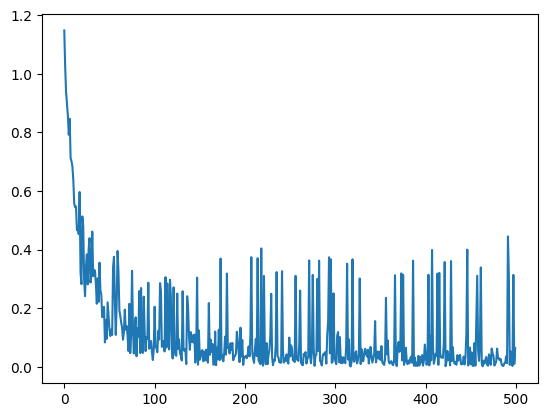

In [169]:
plt.plot(losses.detach())

In [170]:
losses

tensor([1.1477, 1.0242, 0.9381, 0.8955, 0.8565, 0.7917, 0.8465, 0.7133, 0.7016,
        0.6839, 0.6384, 0.5578, 0.5449, 0.5475, 0.4666, 0.4766, 0.4527, 0.5966,
        0.3226, 0.2821, 0.5134, 0.4800, 0.2962, 0.2414, 0.3435, 0.3839, 0.2814,
        0.4033, 0.4392, 0.2875, 0.3166, 0.4616, 0.3091, 0.3305, 0.3282, 0.2824,
        0.2155, 0.3022, 0.2218, 0.3556, 0.2607, 0.2462, 0.1696, 0.1748, 0.2046,
        0.0834, 0.1592, 0.0957, 0.2203, 0.1729, 0.1281, 0.1053, 0.1271, 0.1089,
        0.3392, 0.3755, 0.2257, 0.1090, 0.2159, 0.3953, 0.3216, 0.1925, 0.1734,
        0.1512, 0.1330, 0.0927, 0.1189, 0.1951, 0.1269, 0.1394, 0.1084, 0.0542,
        0.2151, 0.0466, 0.1132, 0.3278, 0.1322, 0.0456, 0.1326, 0.1691, 0.0365,
        0.1308, 0.1032, 0.2589, 0.0471, 0.2690, 0.0543, 0.0475, 0.2396, 0.1159,
        0.0535, 0.1004, 0.0950, 0.2872, 0.0618, 0.0786, 0.0883, 0.0521, 0.0234,
        0.0585, 0.2052, 0.0682, 0.0645, 0.0498, 0.1229, 0.0931, 0.2857, 0.2573,
        0.0681, 0.0834, 0.0886, 0.0528, 

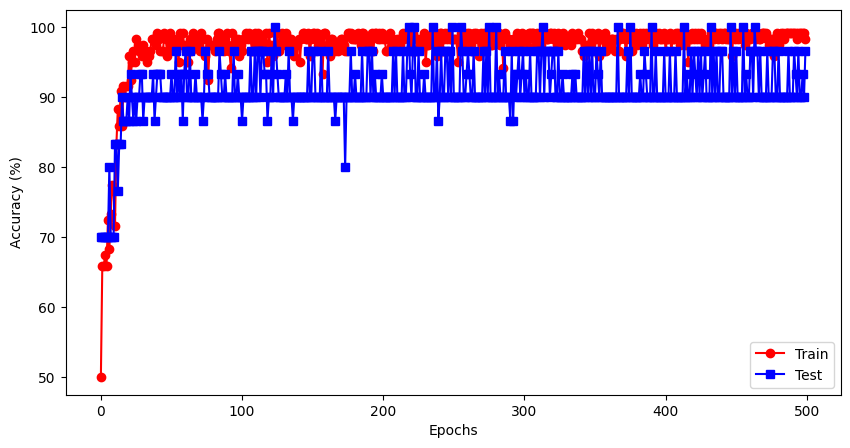

In [171]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()